In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
fake_job = pd.read_csv('df_cleaned.csv')

In [3]:
fake_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10593 entries, 0 to 10592
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           10593 non-null  int64
 1   has_company_logo     10593 non-null  int64
 2   employment_type      10593 non-null  int64
 3   required_experience  10593 non-null  int64
 4   required_education   10593 non-null  int64
 5   function             10593 non-null  int64
 6   fraudulent           10593 non-null  int64
 7   state                10593 non-null  int64
 8   words_count          10593 non-null  int64
 9   words_mapped         10593 non-null  int64
dtypes: int64(10)
memory usage: 827.7 KB


In [4]:
del fake_job['Unnamed: 0']

In [5]:
fake_job.head()

,has_company_logo,employment_type,required_experience,required_education,function,fraudulent,state,words_count,words_mapped
0,1,3,4,6,22,0,35,1596,2
1,1,2,6,6,23,0,13,1594,2
2,1,1,5,1,32,0,8,3397,4
3,1,1,5,1,16,0,10,2716,3
4,0,2,6,6,23,0,21,2262,2


# Split the taining and test dataset

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = fake_job[['has_company_logo', 'employment_type', 'required_experience', 'required_education', 'function', 'state', 'words_mapped']]
y = fake_job['fraudulent']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7097 entries, 10357 to 7705
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   has_company_logo     7097 non-null   int64
 1   employment_type      7097 non-null   int64
 2   required_experience  7097 non-null   int64
 3   required_education   7097 non-null   int64
 4   function             7097 non-null   int64
 5   state                7097 non-null   int64
 6   words_mapped         7097 non-null   int64
dtypes: int64(7)
memory usage: 443.6 KB


# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Training Accuracy: ', accuracy_score(y_train, lr.predict(X_train)))
print('Test Accuracy: ', str(accuracy_score(y_test,lr.predict(X_test))))

Training Accuracy:  0.9327885021840214
Test Accuracy:  0.9393592677345538


In [12]:
y_pred_lr = lr.predict(X_test)
conf_matrix_lr = confusion_matrix(y_true = y_test, y_pred = y_pred_lr)

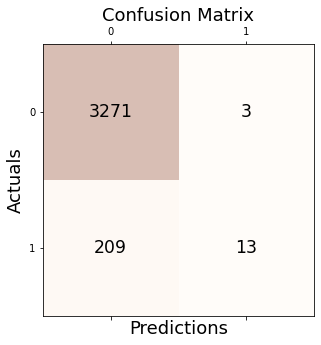

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_lr, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix_lr.shape[0]):
    for j in range(conf_matrix_lr.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_lr[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [14]:
print('Precision: %.3f' % precision_score(y_test, y_pred_lr))
print('Recall: %.3f' % recall_score(y_test, y_pred_lr))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_lr))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_lr))

Precision: 0.812
Recall: 0.059
Accuracy: 0.939
F1 Score: 0.109


# Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train,y_train)
print('Training Accuracy: ', accuracy_score(y_train, RF.predict(X_train)))
print('Test Accuracy: ', str(accuracy_score(y_test,RF.predict(X_test))))

Training Accuracy:  0.9832323516979006
Test Accuracy:  0.9522311212814645


In [16]:
y_pred_RF = RF.predict(X_test)
conf_matrix_RF = confusion_matrix(y_true = y_test, y_pred = y_pred_RF)

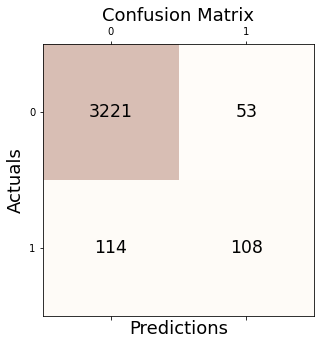

In [17]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_RF, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix_RF.shape[0]):
    for j in range(conf_matrix_RF.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_RF[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [18]:
print('Precision: %.3f' % precision_score(y_test, y_pred_RF))
print('Recall: %.3f' % recall_score(y_test, y_pred_RF))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_RF))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_RF))

Precision: 0.671
Recall: 0.486
Accuracy: 0.952
F1 Score: 0.564


# Gaussian Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train,y_train)
print('Training Accuracy: ', accuracy_score(y_train, NB.predict(X_train)))
print('Test Accuracy: ', str(accuracy_score(y_test,NB.predict(X_test))))

Training Accuracy:  0.9361702127659575
Test Accuracy:  0.941933638443936


In [20]:
y_pred_NB = NB.predict(X_test)
conf_matrix_NB = confusion_matrix(y_true = y_test, y_pred = y_pred_NB)

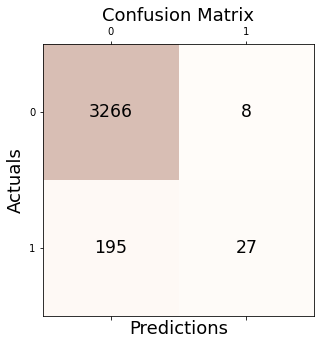

In [21]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_NB, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix_NB.shape[0]):
    for j in range(conf_matrix_NB.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_NB[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [22]:
print('Precision: %.3f' % precision_score(y_test, y_pred_NB))
print('Recall: %.3f' % recall_score(y_test, y_pred_NB))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_NB))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_NB))

Precision: 0.771
Recall: 0.122
Accuracy: 0.942
F1 Score: 0.210


# K-Nearest Neighbors

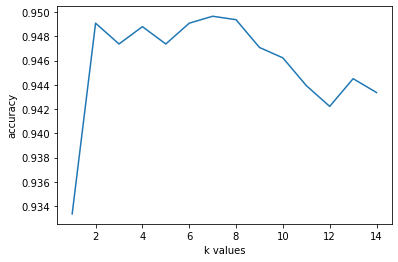

In [23]:
from sklearn.neighbors import KNeighborsClassifier

score_list = []
for each in range(1,15):
    knn_n = KNeighborsClassifier(n_neighbors = each)
    knn_n.fit(X_train,y_train)
    score_list.append(knn_n.score(X_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [24]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)
print('Training Accuracy: ', accuracy_score(y_train, knn.predict(X_train)))
print('Test Accuracy: ', str(accuracy_score(y_test,knn.predict(X_test))))

Training Accuracy:  0.961392137522897
Test Accuracy:  0.9490846681922197


In [25]:
y_pred_knn = knn.predict(X_test)
conf_matrix_knn = confusion_matrix(y_true = y_test, y_pred = y_pred_knn)

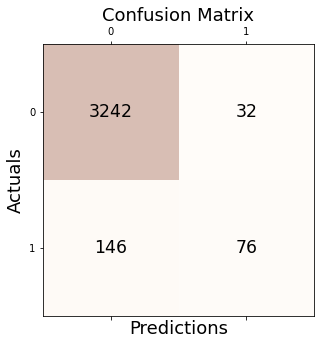

In [26]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_knn, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix_knn.shape[0]):
    for j in range(conf_matrix_knn.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_knn[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [27]:
print('Precision: %.3f' % precision_score(y_test, y_pred_knn))
print('Recall: %.3f' % recall_score(y_test, y_pred_knn))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_knn))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_knn))

Precision: 0.704
Recall: 0.342
Accuracy: 0.949
F1 Score: 0.461


# XGBoost

In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [29]:
import xgboost as xgb

xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)
print('Training Accuracy: ', accuracy_score(y_train, xgb.predict(X_train)))
print('Test Accuracy: ', str(accuracy_score(y_test,xgb.predict(X_test))))

Training Accuracy:  0.9749189798506411
Test Accuracy:  0.955091533180778


In [30]:
y_pred_xgb = xgb.predict(X_test)
conf_matrix_xgb = confusion_matrix(y_true = y_test, y_pred = y_pred_xgb)

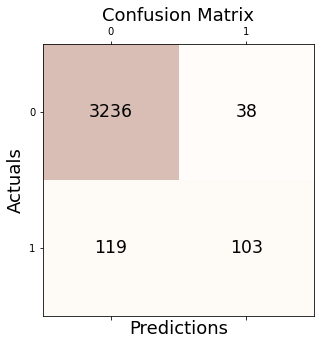

In [31]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_xgb, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix_xgb.shape[0]):
    for j in range(conf_matrix_xgb.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_xgb[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [32]:
print('Precision: %.3f' % precision_score(y_test, y_pred_xgb))
print('Recall: %.3f' % recall_score(y_test, y_pred_xgb))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_xgb))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_xgb))

Precision: 0.730
Recall: 0.464
Accuracy: 0.955
F1 Score: 0.567


Among the models we used, random forest has the appropriate performance.

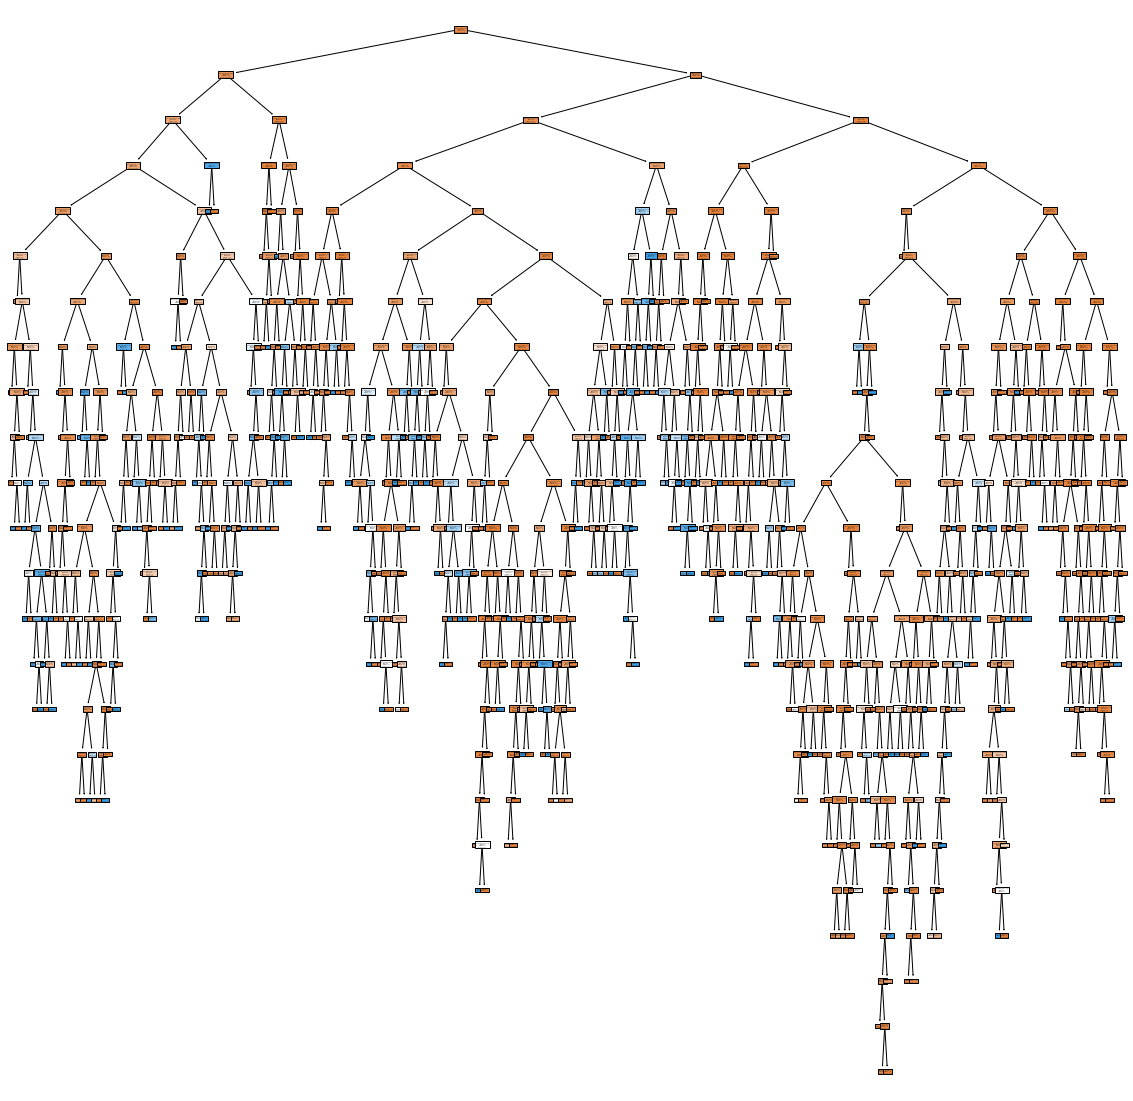

In [33]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,20))
_ = tree.plot_tree(RF.estimators_[0], feature_names=X_train.columns, filled=True)